<a href="https://colab.research.google.com/github/1000PunchMan/DA_Python/blob/main/%D0%AF%D0%BD%D0%B4%D0%B5%D0%BA%D1%81_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Делаем предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении есть данные 500 пользователей. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше

Задачи исследования
1. Осмотр и обработка данных
- посмотрим наборы данных
- сделаем предварительные выводы
- поищем аномалии
- найти и обработать пропуски
- заменить некорректные типы данных
- удалить дубликаты
- привести данные к нужным типам


2. Подготовка данных  
Посчитайте для каждого пользователя:

- количество сделанных звонков и израсходованных минут разговора по месяцам
- количество отправленных сообщений по месяцам
- объем израсходованного интернет-трафика по месяцам
- помесячную выручку с каждого пользователя
(вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножьте на значение из тарифного плана)

3. Анализ данных
- Опишите поведение клиентов оператора, исходя из выборки
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа
в месяц? 
- Посчитайте среднее количество, дисперсию и стандартное отклонение
- Постройте гистограммы. Опишите распределения


4. Проверка гипотез
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
Пороговое значение alpha задайте самостоятельно.

Поясните:

- как вы формулировали нулевую и альтернативную гипотезы
- какой критерий использовали для проверки гипотез и почему


5. Результаты исследования
- Общие выводы
- Рекомендации

Этап 1. Опишем наборы данных, получим их, импортируем библиотеки


Описание тарифов  
**Тариф «Смарт»**

Ежемесячная плата: 550 рублей  
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  

**Стоимость услуг сверх тарифного пакета:**  
минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)  
сообщение: 3 рубля  
1 Гб интернет-трафика: 200 рублей  

**Тариф «Ультра»**  
Ежемесячная плата: 1950 рублей  
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  

**Стоимость услуг сверх тарифного пакета:**  
минута разговора: 1 рубль  
сообщение: 1 рубль  
1 Гб интернет-трафика: 150 рублей  

Описание данных  
Путь к файлам:

/datasets/calls.csv  
/datasets/internet.csv  
/datasets/messages.csv  
/datasets/tariffs.csv  
/datasets/users.csv  
Описание таблиц  

**Таблица users (информация о пользователях):**  
user_id — уникальный идентификатор пользователя  
first_name — имя пользователя  
last_name — фамилия пользователя  
age — возраст пользователя (годы)  
reg_date — дата подключения тарифа (день, месяц, год)  
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)  
city — город проживания пользователя  
tarif — название тарифного плана  

**Таблица calls (информация о звонках):**  
id — уникальный номер звонка  
call_date — дата звонка  
duration — длительность звонка в минутах  
user_id — идентификатор пользователя, сделавшего звонок  

**Таблица messages (информация о сообщениях):**
id — уникальный номер сообщения  
message_date — дата сообщения  
user_id — идентификатор пользователя, отправившего сообщение  

**Таблица internet (информация об интернет-сессиях):**  
id — уникальный номер сессии  
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)  
session_date — дата интернет-сессии  
user_id — идентификатор пользователя  

**Таблица tariffs (информация о тарифах):**  
tariff_name — название тарифа  
rub_monthly_fee — ежемесячная абонентская плата в рублях  
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату  
messages_included — количество сообщений в месяц, включённых в абонентскую плату  
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со - 101 минуты будет взиматься плата)  
rub_per_message — стоимость отправки сообщения сверх тарифного пакета  
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)  

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [ ]:
users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')
calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')
messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')
tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')


# Осмотр и обработка данных
## Таблица users

In [ ]:
users.head(3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


In [ ]:
users.info()
users.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


Аномилий в данных не выявлено.  
Приведем даты к правильному типу

In [ ]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y-%m-%d')
users.head(3)


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


In [ ]:
users.duplicated().sum()

0

В таблице users исправлены типы перменных, а также проверены данные на дубликаты.  
## Таблица calls

In [ ]:
calls.info()
calls.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


заменим тип у call_date

In [ ]:
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y-%m-%d')

In [ ]:
calls.duplicated().sum()

0

## Таблица tariffs

In [ ]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


поменяем название tariff_name на tariff, чтобы в дальнейшем было удобнее работать

In [ ]:
tariffs = tariffs.rename(columns=({'tariff_name':'tariff'}))

Всё чётко. Идём дальше

## Таблица messages

In [ ]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [ ]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Пропусков нет. Заменим тип данных для message_date

In [ ]:
messages['message_date'] = pd.to_datetime(messages['message_date'],format='%Y-%m-%d')

## Таблица internet

In [ ]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В таблице internet лишний столбец, дублирующий индекс, а также неправильный тип данных у переменной session_date.


In [ ]:
internet.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y-%m-%d')


In [ ]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


В условии сказано, что оператор засчитывает минуты и интернет в большую сторону, даже если это была всего секунда.  
Округлим мб и минуты в большую сторону до целого числа

In [ ]:
internet['mb_used'] = np.ceil(internet['mb_used']).astype('int')
calls['duration'] = np.ceil(calls['duration']).astype('int')

Предподготовка данных проведена. Идём дальше.

# Подготовка данных

Посчитайте для каждого пользователя:  
- количество сделанных звонков и израсходованных минут разговора по месяцам  
- количество отправленных сообщений по месяцам  
- объем израсходованного интернет-трафика по месяцам  
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножьте на значение из тарифного плана)

**Количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя**

In [ ]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [ ]:
calls['month']= calls['call_date'].dt.month

После того, как выделили в каждой дате месяц, рассчитаем количество звонков для каждого юзер_ид и месяца

In [ ]:
user_calls = calls.groupby(['user_id', 'month'])\
                  .agg({'id':'count','duration':'sum'})\
                  .reset_index() \
                  .rename(columns = {'id':'calls_used','duration':'minutes_used'})

In [ ]:
user_calls.head(3)

,user_id,month,calls_used,minutes_used
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340


Всё гуд, переходим к следующему пункту

**Количество отправленных сообщений по месяцам для каждого пользователя**

In [ ]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Аналогично, вытащим месяц из message_date, проведем группировку по пользователям и месяцу и посчитаем количество отправленных сообщений

In [ ]:
messages['month']= messages['message_date'].dt.month

user_messages = messages.groupby(['user_id', 'month'])\
                  .agg({'id':'count'})\
                  .reset_index() \
                  .rename(columns = {'id':'messages_used'})

In [ ]:
user_messages.head(3)

,user_id,month,messages_used
0,1000,5,22
1,1000,6,60
2,1000,7,75


In [ ]:
user_messages.shape

(2717, 3)

**Объем израсходованного интернет-трафика по месяцам для пользователей**

In [ ]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000


In [ ]:
internet['month']= internet['session_date'].dt.month

user_internet = internet.groupby(['user_id', 'month'])\
                  .agg({'mb_used':'sum'})\
                  .reset_index()

In [ ]:
user_internet.head(3)


,user_id,month,mb_used
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016


In [ ]:
user_internet.shape

(3203, 3)

**помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножьте на значение из тарифного плана)**

In [ ]:
user_data = user_calls.merge(user_internet, on = ['user_id','month'],how = 'outer').merge(user_messages, on = ['user_id','month'],how = 'outer').merge(users, on ='user_id',how='left')\
                      .merge(tariffs, on = 'tariff',how='left')

In [ ]:
user_data.isna().sum()

user_id                     0
month                       0
calls_used                 40
minutes_used               40
mb_used                    11
messages_used             497
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [ ]:
user_data['calls_used'] = user_data['calls_used'].fillna(0)
user_data['minutes_used'] = user_data['minutes_used'].fillna(0)
user_data['mb_used'] = user_data['mb_used'].fillna(0)
user_data['messages_used'] = user_data['messages_used'].fillna(0)

Удалим часть данных, которые не нужны в анализе

In [ ]:
user_data.drop(['first_name','last_name','reg_date'], axis = 1,inplace=True)

In [ ]:
user_data.head()

,user_id,month,calls_used,minutes_used,mb_used,messages_used,age,churn_date,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,2256.0,22.0,52,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172.0,23257.0,60.0,52,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340.0,14016.0,75.0,52,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,408.0,14070.0,81.0,52,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,466.0,14581.0,57.0,52,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1


**Тариф «Смарт»**

Ежемесячная плата: 550 рублей  
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  

**Стоимость услуг сверх тарифного пакета:**  
минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)  
сообщение: 3 рубля  
1 Гб интернет-трафика: 200 рублей  

**Тариф «Ультра»**  
Ежемесячная плата: 1950 рублей  
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  

**Стоимость услуг сверх тарифного пакета:**  
минута разговора: 1 рубль  
сообщение: 1 рубль  
1 Гб интернет-трафика: 150 рублей  

Посчитаем разницу между включенными в тариф услугами и фактически использованными

In [ ]:
user_data['delta_minutes'] = user_data['minutes_included'] - user_data['minutes_used']
user_data['delta_mb'] = user_data['mb_per_month_included'] - user_data['mb_used']
user_data['delta_messages'] = user_data['messages_included'] - user_data['messages_used']

In [ ]:
user_data.head()

,user_id,month,calls_used,minutes_used,mb_used,messages_used,age,churn_date,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,delta_minutes,delta_mb,delta_messages
0,1000,5,22.0,159.0,2256.0,22.0,52,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1,2841.0,28464.0,978.0
1,1000,6,43.0,172.0,23257.0,60.0,52,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1,2828.0,7463.0,940.0
2,1000,7,47.0,340.0,14016.0,75.0,52,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1,2660.0,16704.0,925.0
3,1000,8,52.0,408.0,14070.0,81.0,52,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1,2592.0,16650.0,919.0
4,1000,9,58.0,466.0,14581.0,57.0,52,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1,2534.0,16139.0,943.0


Сделаем выборку по тарифам "Ультра" и "Смарт", чтобы проанализировать тарифы

In [ ]:
ultra_data = user_data.query('tariff == "ultra"')

Напишем функции для расчета выручки  
функция addition будет направлена на 2 направления:
- Подсчет количества услуг (мин, мб, сообщений), которых не хватило абонентам (абонентский план перевыполнен)
- Расчета выручки тарифа "Ультима" по звонкам и сообщениям (доп. плата составляет 1 руб/мин, 1 руб/сообщение  

Функция internet будет рассчитывать выручку тарифа "Ультима" по интернету

In [ ]:
ultra_data[ultra_data['delta_mb'] < 0]

,user_id,month,calls_used,minutes_used,mb_used,messages_used,age,churn_date,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,delta_minutes,delta_mb,delta_messages
159,1024,11,157.0,1146.0,43146.0,0.0,73,NaT,Санкт-Петербург,ultra,1000,30720,3000,1950,150,1,1,1854.0,-12426.0,1000.0
160,1024,12,136.0,949.0,35985.0,0.0,73,NaT,Санкт-Петербург,ultra,1000,30720,3000,1950,150,1,1,2051.0,-5265.0,1000.0
311,1050,7,35.0,209.0,35205.0,52.0,44,2018-10-03,Тюмень,ultra,1000,30720,3000,1950,150,1,1,2791.0,-4485.0,948.0
383,1060,12,184.0,1233.0,43973.0,52.0,46,NaT,Калуга,ultra,1000,30720,3000,1950,150,1,1,1767.0,-13253.0,948.0
782,1124,10,152.0,1225.0,49789.0,121.0,54,NaT,Махачкала,ultra,1000,30720,3000,1950,150,1,1,1775.0,-19069.0,879.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,1231,9,0.0,0.0,33220.0,188.0,63,NaT,Чебоксары,ultra,1000,30720,3000,1950,150,1,1,3000.0,-2500.0,812.0
3196,1231,10,0.0,0.0,31060.0,185.0,63,NaT,Чебоксары,ultra,1000,30720,3000,1950,150,1,1,3000.0,-340.0,815.0
3198,1231,12,0.0,0.0,32481.0,191.0,63,NaT,Чебоксары,ultra,1000,30720,3000,1950,150,1,1,3000.0,-1761.0,809.0
3200,1328,11,0.0,0.0,35567.0,8.0,44,NaT,Мурманск,ultra,1000,30720,3000,1950,150,1,1,3000.0,-4847.0,992.0


In [ ]:
def addition(t):  
  if t < 0:
    return abs(t)
  return 0

def internet(t):  
  if t < 0:
    return np.ceil(abs(t)/1024) * 150 # делим МБ на 1000, получаем ГБ, округляем до потолка и умножаем на стоимость 1 добавочного ГБ
  return 0

In [ ]:
ultra_data['add_minutes'] = ultra_data['delta_minutes'].apply(addition) #добавление столбцов с кол-вом перевыполненных услуг
ultra_data['add_messages'] = ultra_data['delta_messages'].apply(addition)
ultra_data['add_mb'] = ultra_data['delta_mb'].apply(addition)

ultra_data['add_inc_minutes'] = ultra_data['delta_minutes'].apply(addition) # добавление столбцов с выручкой от использования доп. услуг
ultra_data['add_inc_messages'] = ultra_data['delta_messages'].apply(addition)
ultra_data['add_inc_mb'] = ultra_data['delta_mb'].apply(internet)

In [ ]:
ultra_data.head()

,user_id,month,calls_used,minutes_used,mb_used,messages_used,age,churn_date,city,tariff,...,rub_per_minute,delta_minutes,delta_mb,delta_messages,add_minutes,add_messages,add_mb,add_inc_minutes,add_inc_messages,add_inc_mb
0,1000,5,22.0,159.0,2256.0,22.0,52,NaT,Краснодар,ultra,...,1,2841.0,28464.0,978.0,0,0,0.0,0,0,0.0
1,1000,6,43.0,172.0,23257.0,60.0,52,NaT,Краснодар,ultra,...,1,2828.0,7463.0,940.0,0,0,0.0,0,0,0.0
2,1000,7,47.0,340.0,14016.0,75.0,52,NaT,Краснодар,ultra,...,1,2660.0,16704.0,925.0,0,0,0.0,0,0,0.0
3,1000,8,52.0,408.0,14070.0,81.0,52,NaT,Краснодар,ultra,...,1,2592.0,16650.0,919.0,0,0,0.0,0,0,0.0
4,1000,9,58.0,466.0,14581.0,57.0,52,NaT,Краснодар,ultra,...,1,2534.0,16139.0,943.0,0,0,0.0,0,0,0.0


Посчитаем суммарную выручку выручку с каждого пользователя по месяцам

In [ ]:
ultra_data['income'] = ultra_data['rub_monthly_fee']+ultra_data['add_inc_minutes']+ultra_data['add_inc_messages']+ultra_data['add_inc_mb']

In [ ]:
ultra_data.head()

,user_id,month,calls_used,minutes_used,mb_used,messages_used,age,churn_date,city,tariff,...,delta_minutes,delta_mb,delta_messages,add_minutes,add_messages,add_mb,add_inc_minutes,add_inc_messages,add_inc_mb,income
0,1000,5,22.0,159.0,2256.0,22.0,52,NaT,Краснодар,ultra,...,2841.0,28464.0,978.0,0,0,0.0,0,0,0.0,1950.0
1,1000,6,43.0,172.0,23257.0,60.0,52,NaT,Краснодар,ultra,...,2828.0,7463.0,940.0,0,0,0.0,0,0,0.0,1950.0
2,1000,7,47.0,340.0,14016.0,75.0,52,NaT,Краснодар,ultra,...,2660.0,16704.0,925.0,0,0,0.0,0,0,0.0,1950.0
3,1000,8,52.0,408.0,14070.0,81.0,52,NaT,Краснодар,ultra,...,2592.0,16650.0,919.0,0,0,0.0,0,0,0.0,1950.0
4,1000,9,58.0,466.0,14581.0,57.0,52,NaT,Краснодар,ultra,...,2534.0,16139.0,943.0,0,0,0.0,0,0,0.0,1950.0


**Проделаем аналогичные манипуляции с пользователями тарифа "Смарт"**

In [ ]:
smart_data = user_data.query('tariff == "smart"')

In [ ]:
smart_data.head(3)

,user_id,month,calls_used,minutes_used,mb_used,messages_used,age,churn_date,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,delta_minutes,delta_mb,delta_messages
8,1001,11,59.0,430.0,18452.0,0.0,41,NaT,Москва,smart,50,15360,500,550,200,3,3,70.0,-3092.0,50.0
9,1001,12,63.0,414.0,14053.0,0.0,41,NaT,Москва,smart,50,15360,500,550,200,3,3,86.0,1307.0,50.0
10,1002,6,15.0,117.0,10871.0,4.0,59,NaT,Стерлитамак,smart,50,15360,500,550,200,3,3,383.0,4489.0,46.0


Стоимость услуг сверх тарифного пакета:  
минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе   засчитывается целая минута.)  
сообщение: 3 рубля  
1 Гб интернет-трафика: 200 рублей  

In [ ]:
def minutes_sm(t):
  if t < 0:
    return np.ceil(abs(t)) * 3
  return 0

def internet_s(t):
  if t < 0:
    return np.ceil(abs(t)/1000) *200
  return 0

Аналогично сделаем столбики с количественными показателями перевыполненного плана и выручки

In [ ]:
smart_data['add_minutes'] = smart_data['delta_minutes'].apply(addition) # добавление столбцов с кол-вом перевыполненных услуг
smart_data['add_messages'] = smart_data['delta_messages'].apply(addition)
smart_data['add_mb'] = smart_data['delta_mb'].apply(addition)

smart_data['add_inc_minutes'] = smart_data['delta_minutes'].apply(minutes_sm) # добавление столбцов с выручкой от использования доп. услуг
smart_data['add_inc_messages'] = smart_data['delta_messages'].apply(minutes_sm)
smart_data['add_inc_mb'] = smart_data['delta_mb'].apply(internet_s)


In [ ]:
smart_data['income'] = smart_data['rub_monthly_fee']+smart_data['add_inc_minutes']+smart_data['add_inc_messages']+smart_data['add_inc_mb']

In [ ]:
smart_data.head()

,user_id,month,calls_used,minutes_used,mb_used,messages_used,age,churn_date,city,tariff,...,delta_minutes,delta_mb,delta_messages,add_minutes,add_messages,add_mb,add_inc_minutes,add_inc_messages,add_inc_mb,income
8,1001,11,59.0,430.0,18452.0,0.0,41,NaT,Москва,smart,...,70.0,-3092.0,50.0,0.0,0.0,3092.0,0.0,0.0,800.0,1350.0
9,1001,12,63.0,414.0,14053.0,0.0,41,NaT,Москва,smart,...,86.0,1307.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,550.0
10,1002,6,15.0,117.0,10871.0,4.0,59,NaT,Стерлитамак,smart,...,383.0,4489.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,550.0
11,1002,7,26.0,214.0,17601.0,11.0,59,NaT,Стерлитамак,smart,...,286.0,-2241.0,39.0,0.0,0.0,2241.0,0.0,0.0,600.0,1150.0
12,1002,8,42.0,289.0,20347.0,13.0,59,NaT,Стерлитамак,smart,...,211.0,-4987.0,37.0,0.0,0.0,4987.0,0.0,0.0,1000.0,1550.0


Обьединим таблицы "смарт" и "ультима"

In [ ]:
len(ultra_data) + len(smart_data), len(user_data)

(3214, 3214)

In [ ]:
union_datas = pd.concat([smart_data, ultra_data], ignore_index=True)

In [ ]:
union_datas.head()

,user_id,month,calls_used,minutes_used,mb_used,messages_used,age,churn_date,city,tariff,...,delta_minutes,delta_mb,delta_messages,add_minutes,add_messages,add_mb,add_inc_minutes,add_inc_messages,add_inc_mb,income
0,1001,11,59.0,430.0,18452.0,0.0,41,NaT,Москва,smart,...,70.0,-3092.0,50.0,0.0,0.0,3092.0,0.0,0.0,800.0,1350.0
1,1001,12,63.0,414.0,14053.0,0.0,41,NaT,Москва,smart,...,86.0,1307.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,550.0
2,1002,6,15.0,117.0,10871.0,4.0,59,NaT,Стерлитамак,smart,...,383.0,4489.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,550.0
3,1002,7,26.0,214.0,17601.0,11.0,59,NaT,Стерлитамак,smart,...,286.0,-2241.0,39.0,0.0,0.0,2241.0,0.0,0.0,600.0,1150.0
4,1002,8,42.0,289.0,20347.0,13.0,59,NaT,Стерлитамак,smart,...,211.0,-4987.0,37.0,0.0,0.0,4987.0,0.0,0.0,1000.0,1550.0


Обьединили две таблички с показателями по тарифам. Проверили, что все данные на месте. 

# Анализ

- Опишите поведение клиентов оператора, исходя из выборки  
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа  в месяц?  
- Посчитайте среднее количество, дисперсию и стандартное отклонение  
- Постройте гистограммы. Опишите распределения  

Проверим, чего не хватает пользователям по тарифам

## Тариф Ultra


**Тариф «Ультра»**  
Ежемесячная плата: 1950 рублей  
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  

**Стоимость услуг сверх тарифного пакета:**  
минута разговора: 1 рубль  
сообщение: 1 рубль  
1 Гб интернет-трафика: 150 рублей  

In [ ]:
ultra_data[['add_minutes','add_messages','add_mb']].describe().T

,count,mean,std,min,25%,50%,75%,max
add_minutes,985.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
add_messages,985.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
add_mb,985.0,754.551269,2432.375777,0.0,0.0,0.0,0.0,19069.0


Исходя из таблицы, можно увидеть, что клиентам тарифа Ультра полностью хватает услуг в рамках сообщений и минут, однако видно, что некоторым пользователям не хватает интернета

In [ ]:
percent = len(ultra_data[ultra_data['add_mb'] > 0]) / len(ultra_data)
count = len(ultra_data[ultra_data['add_mb'] > 0])
print('Доля клиентов тарифа Ультра покупающих дополнительные мегабайты - {:.2%}'.format(percent))
print('Количество клиентов тарифа Ультра покупающих дополнительные мегабайты - {:.2f}'.format(count))

Доля клиентов тарифа Ультра покупающих дополнительные мегабайты - 13.60%
Количество клиентов тарифа Ультра покупающих дополнительные мегабайты - 134.00


In [ ]:
con_ultra = {'mb_used':30720,'minutes_used':3000,'messages_used':1000}
con_smart = {'mb_used':15000,'minutes_used':500,'messages_used':50}

In [ ]:
def test1(df,tarrif,column):
  print('Среднее столбца {} - {:.2f}'.format(column,df[column].mean()))
  print('Медиана столбца {} - {:.2f}'.format(column,df[column].median()))
  print('Дисперсия столбца {} - {:.2f}'.format(column,np.var(df[column])))
  print('Стандартное отклонение столбца {} - {:.2f}'.format(column,np.std(df[column])))
  print('99 перцентиль столбца {} - {:.2f}'.format(column,df[column].quantile(0.99)))
  more_than_border = len(df[df[column] > (con_ultra[column] if tarrif == 'ultra' else con_smart[column])])

  print('Количество абонентов превышевших пакет услуг - {:.2f}, их доля - {:.2%}'.format(more_than_border,more_than_border / len(df[column])))

  ax = df[column].hist(bins=20)
  ax.axvline(x = con_ultra[column] if tarrif == 'ultra' else con_smart[column], 
             color = 'red', label = 'Пороговое значение')
  ax.axvline(x = df[column].quantile(0.99), 
             color = 'blue', label = '99 перцентиль')
  plt.legend(), plt.title(f'Распределение использованных {column}'), plt.xlabel(f'Количество использованных {column}'), plt.ylabel('Частота');


Среднее столбца mb_used - 19486.90
Медиана столбца mb_used - 19324.00
Дисперсия столбца mb_used - 101832133.11
Стандартное отклонение столбца mb_used - 10091.19
99 перцентиль столбца mb_used - 43046.04
Количество абонентов превышевших пакет услуг - 134.00, их доля - 13.60%


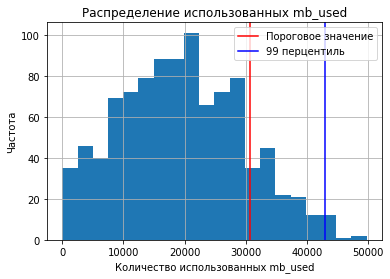

In [ ]:
test1(ultra_data,'ultra','mb_used')

Исходя из данных видно, что в среднем используется 20 ГБ, при этом больше 13% клиентов не хватает 30 ГБ.  
Распределение похоже на нормальное с хвостом справа

Среднее столбца minutes_used - 526.62
Медиана столбца minutes_used - 518.00
Дисперсия столбца minutes_used - 100771.22
Стандартное отклонение столбца minutes_used - 317.44
99 перцентиль столбца minutes_used - 1291.12
Количество абонентов превышевших пакет услуг - 0.00, их доля - 0.00%


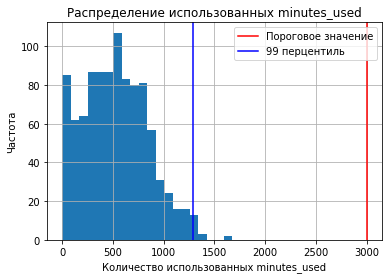

In [ ]:
test1(ultra_data,'ultra','minutes_used')

При этом видно, что количество использованных минут очень мало. В среднем тратится не больше 600 минут в месяц, тогда как их количество в пакете - 3000.  
99 перцентиль использует 1291 минуту.  
**Вывод**: количество минут неоправданно завышено. Абоненентам не нужно такое большое количество минут.

Среднее столбца messages_used - 49.36
Медиана столбца messages_used - 38.00
Дисперсия столбца messages_used - 2282.95
Стандартное отклонение столбца messages_used - 47.78
99 перцентиль столбца messages_used - 183.32
Количество абонентов превышевших пакет услуг - 0.00, их доля - 0.00%


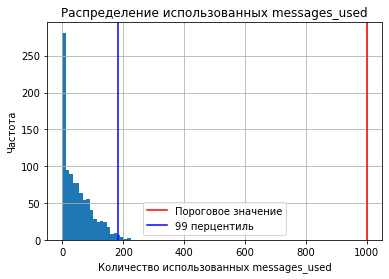

In [ ]:
test1(ultra_data,'ultra','messages_used')

Также абоненты тарифа Ультра не используют сообщения в том объёме, который представлен в тарифном плане.  
В среднем используется около 50 сообщений.  
99 перцентиль - 183  
**Вывод:** низкий спрос клиентов на данный вид услуги

**Итоги по тарифу Ultra**
- По кол-ву использованных услуг можно заключить, что в основном клиенты заинтересованы в большом кол-ве мегабайт. более 12% абонентов не укладываются в тарифный план - 30гб и покупают доп. гиги. 
- Звонки и сообщения являются намного менее популярными. Ни один пользователь не превысил тарифный план. 
- Наименьший спрос на сообщения. 

## Тариф Smart

In [ ]:
smart_data.head()


,user_id,month,calls_used,minutes_used,mb_used,messages_used,age,churn_date,city,tariff,...,delta_minutes,delta_mb,delta_messages,add_minutes,add_messages,add_mb,add_inc_minutes,add_inc_messages,add_inc_mb,income
8,1001,11,59.0,430.0,18452.0,0.0,41,NaT,Москва,smart,...,70.0,-3092.0,50.0,0.0,0.0,3092.0,0.0,0.0,800.0,1350.0
9,1001,12,63.0,414.0,14053.0,0.0,41,NaT,Москва,smart,...,86.0,1307.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,550.0
10,1002,6,15.0,117.0,10871.0,4.0,59,NaT,Стерлитамак,smart,...,383.0,4489.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,550.0
11,1002,7,26.0,214.0,17601.0,11.0,59,NaT,Стерлитамак,smart,...,286.0,-2241.0,39.0,0.0,0.0,2241.0,0.0,0.0,600.0,1150.0
12,1002,8,42.0,289.0,20347.0,13.0,59,NaT,Стерлитамак,smart,...,211.0,-4987.0,37.0,0.0,0.0,4987.0,0.0,0.0,1000.0,1550.0


Среднее столбца mb_used - 16229.19
Медиана столбца mb_used - 16531.00
Дисперсия столбца mb_used - 34530412.74
Стандартное отклонение столбца mb_used - 5876.26
99 перцентиль столбца mb_used - 29727.04
Количество абонентов превышевших пакет услуг - 1351.00, их доля - 60.61%


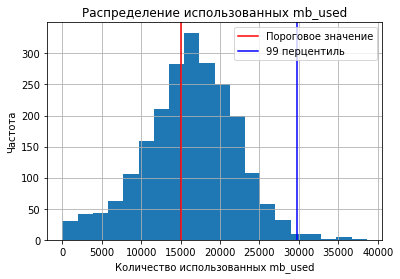

In [ ]:
test1(smart_data,'smart','mb_used')

- 60% абонентов не хватает интернета.  
- Среднее и медиана больше тарифного плана

Среднее столбца minutes_used - 417.93
Медиана столбца minutes_used - 422.00
Дисперсия столбца minutes_used - 36203.07
Стандартное отклонение столбца minutes_used - 190.27
99 перцентиль столбца minutes_used - 872.72
Количество абонентов превышевших пакет услуг - 754.00, их доля - 33.83%


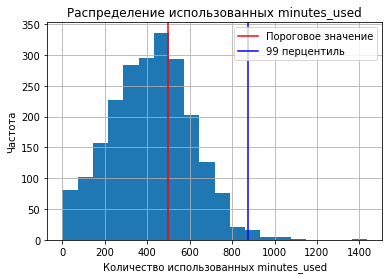

In [ ]:
test1(smart_data,'smart','minutes_used')

- Нехватка минут. 33% пользуются дополнительными минутами. 

Среднее столбца messages_used - 33.38
Медиана столбца messages_used - 28.00
Дисперсия столбца messages_used - 796.46
Стандартное отклонение столбца messages_used - 28.22
99 перцентиль столбца messages_used - 108.00
Количество абонентов превышевших пакет услуг - 564.00, их доля - 25.30%


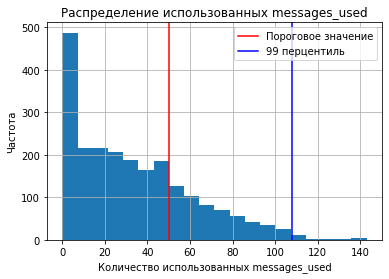

In [ ]:
test1(smart_data,'smart','messages_used')

- Аналогично и с сообщениями - 25% не хватает смс. 

**Вывод по тарифу:**
- Абонентам тарифа Смарт не хватает услуг, включенных в тариф. 
- Наибольшая нехватка интернета - 60%



4. Проверка гипотез
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов  
Пороговое значение alpha задайте самостоятельно.

Поясните:

- как вы формулировали нулевую и альтернативную гипотезы
- какой критерий использовали для проверки гипотез и почему


5. Результаты исследования
- Общие выводы
- Рекомендации

# Проверка гипотез

In [ ]:
a = ultra_data['mb_used'].quantile(0.99)
ultra_data.query('mb_used < @a')

,user_id,month,calls_used,minutes_used,mb_used,messages_used,age,churn_date,city,tariff,...,delta_minutes,delta_mb,delta_messages,add_minutes,add_messages,add_mb,add_inc_minutes,add_inc_messages,add_inc_mb,income
0,1000,5,22.0,159.0,2256.0,22.0,52,NaT,Краснодар,ultra,...,2841.0,28464.0,978.0,0,0,0.0,0,0,0.0,1950.0
1,1000,6,43.0,172.0,23257.0,60.0,52,NaT,Краснодар,ultra,...,2828.0,7463.0,940.0,0,0,0.0,0,0,0.0,1950.0
2,1000,7,47.0,340.0,14016.0,75.0,52,NaT,Краснодар,ultra,...,2660.0,16704.0,925.0,0,0,0.0,0,0,0.0,1950.0
3,1000,8,52.0,408.0,14070.0,81.0,52,NaT,Краснодар,ultra,...,2592.0,16650.0,919.0,0,0,0.0,0,0,0.0,1950.0
4,1000,9,58.0,466.0,14581.0,57.0,52,NaT,Краснодар,ultra,...,2534.0,16139.0,943.0,0,0,0.0,0,0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204,1473,9,0.0,0.0,17307.0,19.0,18,NaT,Красноярск,ultra,...,3000.0,13413.0,981.0,0,0,0.0,0,0,0.0,1950.0
3205,1473,10,0.0,0.0,13703.0,20.0,18,NaT,Красноярск,ultra,...,3000.0,17017.0,980.0,0,0,0.0,0,0,0.0,1950.0
3206,1473,11,0.0,0.0,21692.0,14.0,18,NaT,Красноярск,ultra,...,3000.0,9028.0,986.0,0,0,0.0,0,0,0.0,1950.0
3207,1473,12,0.0,0.0,18432.0,20.0,18,NaT,Красноярск,ultra,...,3000.0,12288.0,980.0,0,0,0.0,0,0,0.0,1950.0


In [ ]:
ultra_data.shape

(985, 27)

**Проверим средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются или нет**

H0: средняя выручки по двум группам равны  
H1: средняя выручки по двум группам НЕ равны

In [ ]:
revenue_ultra = ultra_data['income']
revenue_smart = smart_data['income']



In [ ]:
alpha = 0.05

print('Средняя выручка тарифа Ультра - {:.2f}'.format(ultra_data['income'].mean()))
print('Средняя выручка тарифа Смарт - {:.2f}'.format(smart_data['income'].mean()))

p_value = stats.ttest_ind(revenue_ultra, revenue_smart, equal_var = False).pvalue
print('p-value: {:.5f}'.format(p_value))

# анализируем результат
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: следовательно, средние в двух группах не равны.')
else:
    print('Не отвергаем нулевую гипотезу: средние в двух группах равны.')

Средняя выручка тарифа Ультра - 2071.07
Средняя выручка тарифа Смарт - 1305.41
p-value: 0.00000
Отвергаем нулевую гипотезу: следовательно, средние в двух группах не равны.


count    2229.000000
mean     1305.406460
std       833.795018
min       550.000000
25%       550.000000
50%      1043.000000
75%      1765.000000
max      6970.000000
Name: income, dtype: float64

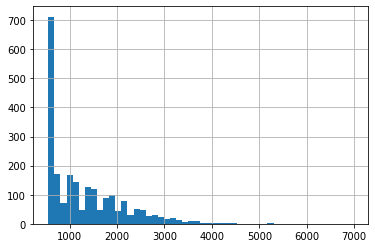

In [ ]:
smart_data['income'].hist(bins = 50)
smart_data['income'].describe()

In [ ]:
a = smart_data['income'].mean()
b = ultra_data['income'].mean()
print('Средняя выручка по тарифу Смарт привысила тарифный план на {:.2%} - {:.0f} рублей/мес'.format(a/550-1,a))
print('Средняя выручка по тарифу Ультра привысила тарифный план на {:.2%} - {:.0f} рублей/мес'.format(b/1950-1,b))

Средняя выручка по тарифу Смарт привысила тарифный план на 137.35% - 1305 рублей/мес
Средняя выручка по тарифу Ультра привысила тарифный план на 6.21% - 2071 рублей/мес


**Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей**

H0: средняя выручки по двум группам равны  
H1: средняя выручки по двум группам НЕ равны

In [ ]:
revenue_moscow = union_datas.query('city == "Москва"')['income']
revenue_others = union_datas.query('city != "Москва"')['income']


In [ ]:
alpha = 0.05

print('Средняя выручка по Москве - {:.2f}'.format(revenue_moscow.mean()))
print('Средняя выручка по городам кроме Москвы - {:.2f}'.format(revenue_others.mean()))

p_value = stats.ttest_ind(revenue_moscow, revenue_others, equal_var = False).pvalue
print('p-value: {:.5f}'.format(p_value))

# анализируем результат
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: следовательно, средние в двух группах не равны.')
else:
    print('Не отвергаем нулевую гипотезу: средние в двух группах равны.')

Средняя выручка по Москве - 1556.04
Средняя выручка по городам кроме Москвы - 1536.31
p-value: 0.56783
Не отвергаем нулевую гипотезу: средние в двух группах равны.


# Результаты исследования

**Общие выводы**

- Абонентам Ультра хватает всего кроме интернета. Сообщения и минуты используются слабо - большая часть просто сгорает. Средняя выручка при этом больше тарифной платы только на 6%.
- Абонентам Смарт не хватает ни сообщений, ни минут, ни интернета - таким образом, предполагается, что выручка будет формироваться за счёт доп. услуг. Как мы видим, средняя выручка превышает тарифную плату на 137%. 


**Рекомендации**

Для тарифа Ультра:
- уменьшить кол-во минут и сообщений, т.к. они не используются 
- Либо уменьшить кол-во Гб, либо увеличить доп гб для увеличения выручки, т.к. абоненты обращают внимание на явные издержки - абонентская плата, но не так обращают внимание на стоимость доп. услуг. Клиенты смарта берут тариф из-за низкой цены, но, большинству, не хватает услуг и приходится переплачивать за доп. услуги

Для тарифа Смарт:
- Можно уменьшить кол-во услуг в пакете и стоимость тарифа при этом повысив стоимость доп.услуг. За счёт низкой цены будут привлечено большое кол-во людей, однако по опыту можно сказать, что услуг, включенных в тариф, им не будет хватать.